In [5]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [6]:
# a simple custom collate function, just to show the idea
def my_collate(batch):
    data = [item[0] for item in batch]
    target = [item[1] for item in batch]
    target = torch.LongTensor(target)
    return [data, target]


def show_image_batch(img_list, title=None):
    num = len(img_list)
    fig = plt.figure()
    for i in range(num):
        ax = fig.add_subplot(1, num, i+1)
        ax.imshow(img_list[i].numpy().transpose([1,2,0]))
        ax.set_title(title[i])

    plt.show()

In [7]:
#  do not do randomCrop to show that the custom collate_fn can handle images of different size
train_transforms = transforms.Compose([transforms.Scale(size = 224),
                                       transforms.ToTensor(),
                                       ])

# change root to valid dir in your system, see ImageFolder documentation for more info
train_dataset = datasets.ImageFolder(root="data/train/",
                                     transform=train_transforms)

trainset = DataLoader(dataset=train_dataset,
                      batch_size=4,
                      shuffle=True,
                      collate_fn=my_collate, # use custom collate function here
                      pin_memory=True)

trainiter = iter(trainset)
imgs, labels = trainiter.next()

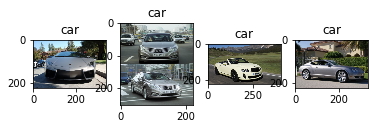

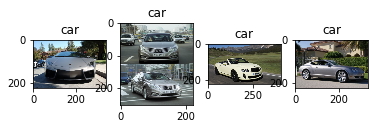

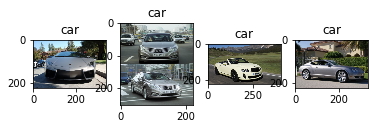

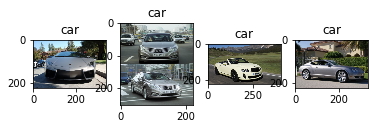

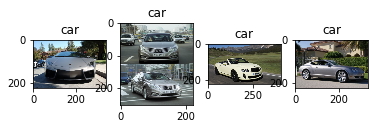

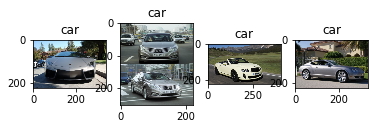

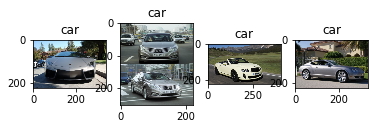

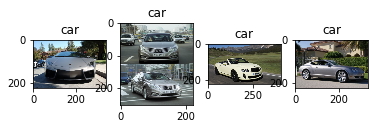

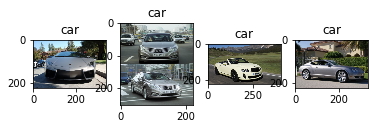

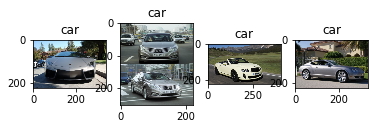

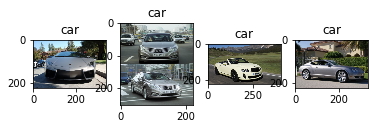

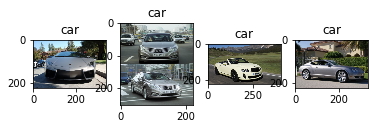

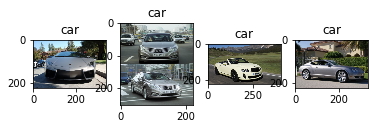

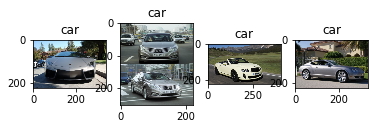

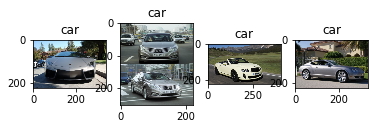

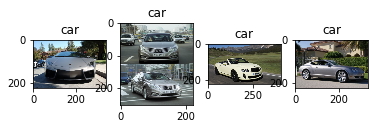

In [10]:
# print(type(imgs), type(labels))
for i in range(16):
    show_image_batch(imgs, title=[train_dataset.classes[x] for x in labels])